# Исследование перспективных игровых проектов.


## Введение

**Заказчик** — интернет-магазин «Стримчик»

**Цель исследования** 

* Выявить определяющие успешность игры закономерности
* Провести исследовательский анализ данных
* Составить портрет пользователя каждого региона
* Проверить гипотезы


**Входные данные**  — статистика из открытых источников. доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (Xbox или PlayStation).


**Результаты исследования** — На полученных данных будет произведен анализ всех выпушенных игр до 2016 позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год (2017 год)

## Подготовка данных

### Изучение данных

In [1]:
# Подружу базы которые использвоал ранее или которые могут пригодиться

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
# Прочитаю файл путь - /datasets/games.csv 
df = pd.read_csv('datasets/games.csv')

# посмотрю что выходит возможно нужно загружать с разделителем
df

#все ок

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Описание таблицы**  
<a id='info_DB'></a>

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация * определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
print('Информация по таблице:', '\n')
df.info()
print()
print('Количество пропусков:', '\n')
print(df.isna().sum(), '\n', '\n')
print('Процент пропусков:', '\n')
print(df.isna().mean()*100, '\n')

display(df.head())

display(df.describe())
print()
print('Число явных дубликатов:', df.duplicated().sum(), '\n')


Информация по таблице: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Количество пропусков: 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



Число явных дубликатов: 0 



**Промежуточный вывод:**

Посмотреть на описания столбцов можно тут -> [Расшифровка столбцов](#info_DB)

* Есть пропуски: `Name` < 1%, `Year_of_Release` = 1,6%, `Genre` < 1%, `Critic_Score`, `User_Score` и `Rating` > 40%
* Замена формата: `Year_of_Release` float64 -> int, `Critic_Score` float64 -> int (проверить, скорее всего целые оценки),  `User_Score` object -> float64
* необходимо привести в название столбцов в нижний регистр

**Следующий шаг - преодобработка данных**
* Проверить все пропуски, сперва `Name` и `Genre` - одинаковый %, возможно одни строки
* Проверить неявные повторы у `Name`, `Platform` и `Genre`


### Предобработка данных

In [4]:
# Приведу вначале название всех столбцов в нижний регистр для удобства дальнейшей работы
df.columns = df.columns.str.lower().tolist()
display(df.head())

# посмотрю что там за пропуски в названиях
display(df[df['name'].isna()])

# ага, не знаем название, жанр. Так как пропуски составляют всего 0.01% 
# и нет логики по которой можно было их восстановить, удалим данные строки

df.dropna(subset=['name'], inplace=True)




,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
print('Уникальные значения названия')
print(df['name'].sort_values().unique(), '\n')

print('Уникальные значения платформы')
print(df['platform'].sort_values().unique(), '\n')
# Видим, все ок

print('Уникальные значения жанра')
print(df['genre'].sort_values().unique(), '\n')
# Видим, все ок

print('Уникальные значения рейтинга')
print(df['rating'].sort_values().unique(), '\n')
# Видим, все ок, крмое пропусков

print('Уникальные значения оценки критиков')
print(df['critic_score'].sort_values().unique(), '\n')
# Видим, что только целые значения, значит можно в int


Уникальные значения названия
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!'] 

Уникальные значения платформы
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne'] 

Уникальные значения жанра
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy'] 

Уникальные значения рейтинга
['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan] 

Уникальные значения оценки критиков
[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 9

Неявных повторов среди жанров и платформы не замечено, можно изучать теперь остальные пропуски

In [6]:
# посмотрим на пропуски в годах
print('Игры с пропуском в годах')
display(df[df.year_of_release.isna()])

# В некоторых играх где пропущен год, имеется год в названии игры, но он не всегда отражает суть.
# Пример `wwe Smackdown vs. Raw 2006` на самом деле выпущена в 2005 году

# Для работы в дальнейшем помимо года, нам понадобиться - жанр, платформа и рейтинг (ESRB)
# Мы можем дополнительно изучить где игры с Null годом и rating (т.к. жанр и платфарма уже без Null значений)

print('\n', 'Игры с пропуском в годах и рейтинге (ESRB)')
display(df[df['year_of_release'].isna() & df['rating'].isna()])


Игры с пропуском в годах


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN



 Игры с пропуском в годах и рейтинге (ESRB)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [7]:
df_genre = df.pivot_table(index=['genre'], columns='rating', values=['platform'], aggfunc= 'count', fill_value='X')
print('Количество игры с определенным рейтингом по платформам:')
display(df_genre)
print('\n', 'Количество игры с Null рейтингом по жанрам:')
df[df.rating.isna()].groupby('genre').count()

Количество игры с определенным рейтингом по платформам:


platform                                            
rating             AO       E   E10+   EC  K-A      M   RP      T
genre                                                            
Action            1.0   416.0  481.0  1.0    X  608.0    X  681.0
Adventure           X   162.0   68.0  2.0    X   99.0    X  115.0
Fighting            X     8.0   19.0    X    X   49.0    X  362.0
Misc                X   457.0  167.0  5.0  1.0   13.0    X  239.0
Platform            X   358.0  144.0    X    X    3.0    X   64.0
Puzzle              X   289.0   43.0    X    X      X    X   10.0
Racing              X   585.0   96.0    X    X   18.0  1.0  172.0
Role-Playing        X    84.0  111.0    X    X  162.0    X  420.0
Shooter             X    48.0   58.0    X    X  565.0    X  348.0
Simulation          X   325.0   48.0    X    X    5.0    X  190.0
Sports              X  1188.0  107.0    X    X   16.0    X  198.0
Strategy            X    70.0   78.0    X  2.0   25.0  2.0  162.0


 Количество игры с Null рейтингом по жанрам:


,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
genre,,,,,,,,,,
Action,1181,1181,1161,1181,1181,1181,1181,15,29,0
Adventure,857,857,853,857,857,857,857,18,24,0
Fighting,411,411,405,411,411,411,411,1,2,0
Misc,868,868,859,868,868,868,868,2,12,0
Platform,319,319,317,319,319,319,319,0,0,0
Puzzle,238,238,233,238,238,238,238,2,3,0
Racing,377,377,370,377,377,377,377,9,11,0
Role-Playing,721,721,711,721,721,721,721,3,3,0
Shooter,304,304,300,304,304,304,304,4,6,0


**Виды рейтингов:**
<a id='rating'></a>

1. **EC** - Данный рейтинг, как видно из нумерации, является самым мягким из всех и подразумевает ориентированность на детей младшего возраста от трёх лет, ничего жуткого и ужасного вы в играх с таким рейтингом там не найдёте.
2. **E** - Здесь всё уже более интересно. Рейтинг подразумевает, что любая игра с ним содержит минимальное количество насилия ( и то, мультяшного) и является игрой "для всех", то есть может понравиться и детям (от 6 лет), и взрослым.
3. **E10+** - Основная разница с предыдущим рейтингом в возрасте потенциального потребителя и чуть большем содержании насилия (опять же, мультяшного и достаточно ненавязчивого).
4. **T** - Тут уже всё заходит несколько дальше предыдущих рейтингов, игры с таким рейтингом направлены на подростковую аудитория и уже могут содержать умеренное насилие, чисто подростковый юмор и умеренное количество откровенных сцен наряду с редким использованием ненормативной лексики.
5. **M** - Один из самых желаемых рейтингов среди любителей условно "взрослых" проектов, ввиду того, что позволяет затрагивать любые взрослые темы и ситуации. В играх с таким рейтингом вы можете обнаружить кучу насилия ( не обязательно жёсткого и не обязательно в большом количестве, рейтинг просто развязывает руки для возможности такого), нецензурную лексику, мрачную атмосферу и всё такое прочее. Пожалуй, один из желаемых рейтингов на нынешнем рынке, но всё же не самый желанный.
6. **AO** - Продукт с таким рейтингом для взрослых и только для взрослых. Как предыдущий, но лучше и качественнее ( не для всех). Другими словами, больше и веселее, отлично подойдёт для тех, кто хочет после тяжёлой работы выплеснуть в виртуальный мир накопившуюся агрессию.
7. **RP** - Псевдорейтинг, информирующий о том, что нормальный всё ещё ожидается. Можно встретить преимущественно в ранних трейлерах и демо.

In [8]:
# посмотрим, что за игры без финального рейтинга
display(df[df['rating'] == 'RP'])

#Игры с рейтингом RP заменим, на Nan - так как это по сути тоже самое
df.replace('RP', np.nan, inplace=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


**Размышления 1**
<a id='Mysl_01'></a>



Мы могли бы заполнить рейтинг игр на основе чаще встречающегося рейтинга - но это риск, что мы отнесем какой-нибудь mortal combat (Fighting) в рейтинг ***Т***, а он ***M*** . Можно было бы заполнить все пустые рейтингом ***M***, но `Fighting` без рейтинга 411 штук, с рейтингом ***Т = 362***
Данная замена может поломать всю статистику. 

319 игр жанра `Platform` без рейтинга, так же не имеют оценки критиков и пользователей, но имеют продажи.

Вариант заполнения поиска каждой игры и сопоставление рейтинга в ручную слишком сложно, так как таких игр 6766 штук.

Варианты решения:

* Удаляем игры в которых год - Null и рейтинг - Null (таких игр 88 штук)
* Пытаемся восстановить год из названия (он приблизительный, часть игр может выпускаться в разных годах в разных регионах, поэтому данная замена возможна)
* Остальные данные с рейтингом и оценкой оставим




In [9]:
# Посмотрю какие игры есть и есть ли смысл их спасать
display(
    df[(df.name.str.contains('198') | df.name.str.contains('199') | df.name.str.contains('200')) 
       & df.year_of_release.isna()]
    ) 

# Есть игры только 2000-х, с рейтингом и неплохими продажами, будем добавлять
game_years = ['2001', '2002', '2003', '2004', '2005', '2006', '2007','2008', '2009', '2010']

for game_years in game_years:    # функция заменяющая год выпуска по названию игры
    df.loc[df.name.str.contains(game_years), 'year_of_release'] = \
        df.loc[df.name.str.contains(game_years), 'year_of_release'].fillna(game_years)
    
display(
    df[(df.name.str.contains('198') | df.name.str.contains('199') | df.name.str.contains('200')) 
       & df.year_of_release.isna()]
    )

display(df[df.name.str.contains('200')])
print('Количество пропусков после заполнения года')
print(df.isna().sum(), '\n')
print(df.isna().mean()*100, '\n')


display(df[df['year_of_release'].isna() & df['rating'].isna()])

# Удалю строки где отсуствует год
df.dropna(subset=['year_of_release'], inplace=True)
print('Количество пропусков после удаления строк')
print(df.isna().sum(), '\n')



# Привиду весь столбец year_of_release в int
df['year_of_release'] = df['year_of_release'].astype('int')
#df['critic_score'] = df['critic_score'].astype('int') #нужно менять Nan на 0, чтобы получилось

df.head()




    
    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
5889,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E
338,FIFA Soccer 2005,PS2,2004.0,Sports,0.58,2.48,0.04,0.59,81.0,7.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16541,G1 Jockey 4 2007,PS2,2007.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16551,Winning Eleven: Pro Evolution Soccer 2007,PC,2006.0,Sports,0.00,0.01,0.00,0.00,88.0,NaN,E
16622,World Snooker Championship 2007,X360,2007.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропусков после заполнения года
name                  0
platform              0
year_of_release     254
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6767
dtype: int64 

name                0.000000
platform            0.000000
year_of_release     1.519775
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.489439
dtype: float64 



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Количество пропусков после удаления строк
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64 



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
# посмотрю на оценки пользователей
df.user_score.unique() 




array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данном столбце встречается значение ***tbd***, что означает - To Be Determined, то есть "Будет определено". Чаще всего используется при выходе игры, когда окончательная дата не известна или к примеру в киберспортивных турнирах, когда в сетке еще не определен противник.

В случае оценки - это явно, странное значение. В случае как с рейтингом ***RP***. Заменим ***tbd*** на ***Nan***


In [11]:
df.replace('tbd', np.nan, inplace=True)

# И сразу приведем в формат float
df['user_score'] = df['user_score'].astype('float')


In [12]:
#Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец total_sales
df['total_sales'] = df['na_sales'] + \
    df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [13]:
df['rating'] = df['rating'].fillna('unknown')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### **Промежуточный вывод**

* Опираясь на [Размышления 1](#Mysl_01) принимаю решение не заполнять жанр, так как это рискованно.
* Заполнять столбец `critic_score` или `user_score` не правильно, так как данные параметры исключетельно уникальны, очень часто даже игры от одного автора имеют категорически разные оценки. Я против накрутки отзывов) Удалять данные столбцы так же не стоит, так как % высокий, а продажи могут сказать даже больше об игре чем её жанр или оценки
* Исправил типы столбцов
* Заполнил пропуски по возможности
* Удалил неактуальные строки
* Добавил итоговый столбец
* В таблице отсутствуют явные дубликаты
* Таблица готова к Анализу






## Исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Cколько игр выпускалось в разные годы, оценка периода

In [14]:
#Посмотрю, сколько игр выпускалось в разные годы. 
df.groupby('year_of_release').count()


,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
year_of_release,,,,,,,,,,,
1980,9,9,9,9,9,9,9,0,0,9,9
1981,46,46,46,46,46,46,46,0,0,46,46
1982,36,36,36,36,36,36,36,0,0,36,36
1983,17,17,17,17,17,17,17,0,0,17,17
1984,14,14,14,14,14,14,14,0,0,14,14
1985,14,14,14,14,14,14,14,1,1,14,14
1986,21,21,21,21,21,21,21,0,0,21,21
1987,16,16,16,16,16,16,16,0,0,16,16
1988,15,15,15,15,15,15,15,1,1,15,15


In [15]:
#Посмотрим суммы продаж ради инстерса по годам sales years
#SY_na_sales = df.groupby('year_of_release')['na_sales'].sum()
#SY_eu_sales = df.groupby('year_of_release')['eu_sales'].sum()
#SY_jp_sales = df.groupby('year_of_release')['jp_sales'].sum()
#SY_other_sales = df.groupby('year_of_release')['other_sales'].sum()

#df_united = pd.merge(SY_na_sales, SY_eu_sales, on='year_of_release', how='outer')
#df_united = pd.merge(df_united, SY_jp_sales, on='year_of_release', how='outer')
#df_united = pd.merge(df_united, SY_other_sales, on='year_of_release', how='outer')

#В целом данные схожие с данной проверкой, плюс тут можем 
SY_all = df.groupby('year_of_release').sum()

print()
display(SY_all)


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,,,,,,,
1980,10.59,0.67,0.00,0.12,0.0,0.0,11.38
1981,33.40,1.96,0.00,0.32,0.0,0.0,35.68
1982,26.92,1.65,0.00,0.31,0.0,0.0,28.88
1983,7.76,0.80,8.10,0.14,0.0,0.0,16.80
1984,33.28,2.10,14.27,0.70,0.0,0.0,50.35
1985,33.73,4.74,14.56,0.92,59.0,5.8,53.95
1986,12.50,2.84,19.81,1.93,0.0,0.0,37.08
1987,8.46,1.41,11.63,0.20,0.0,0.0,21.70
1988,23.87,6.59,15.76,0.99,64.0,2.2,47.21


In [16]:
#Посмотрим из-за чего был скачек
YP_count = df.pivot_table(index=['year_of_release', 'platform'], values=['name'], aggfunc= 'count', fill_value='X')
pd.set_option('display.max_rows', None)
display(YP_count)

name
year_of_release platform      
1980            2600         9
1981            2600        46
1982            2600        36
1983            2600        11
                NES          6
1984            2600         1
                NES         13
1985            2600         1
                DS           1
                NES         11
                PC           1
1986            2600         2
                NES         19
1987            2600         6
                NES         10
1988            2600         2
                GB           1
                NES         11
                PC           1
1989            2600         2
                GB          10
                NES          5
1990            GB           3
                GEN          1
                NES          8
                SNES         4
1991            GB           9
                GEN          1
                NES          7
                SNES        24
1992            GB           7
                GEN          6
                GG           1
                NES          3
                PC           5
                SNES        21
1993            GEN          7
                NES          4
                NG           2
                SCD          1
                SNES        46
1994            3DO          1
                GB           3
                GEN         12
                NES          1
                NG           4
                PC           6
                PS          17
                SAT         19
                SCD          5
                SNES        53
1995            3DO          2
                GB           4
                NG           4
                PC           2
                PS          99
                SAT         52
                SNES        54
                TG16         2
1996            GB           6
                N64         18
                NG           2
                PC           4
                PCFX         1
                PS         164
                SAT         38
                SNES        30
1997            GB           8
                N64         49
                PC           6
                PS         188
                SAT         34
                SNES         4
1998            DC           7
                GB           8
                N64         77
                PC           8
                PS         248
                SAT         29
                SNES         2
1999            DC          14
                GB          11
                N64        102
                PC           7
                PS         200
                SAT          1
                SNES         1
                WS           2
2000            DC          20
                GB          17
                GBA          1
                N64         60
                PC           7
                PS         160
                PS2         82
                WS           2
                XB           1
2001            DC           8
                GB          10
                GBA        107
                GC          22
                N64          9
                PC          15
                PS          91
                PS2        185
                WS           2
                XB          33
2002            DC           1
                GBA        198
                GC         152
                N64          1
                PC          19
                PS          20
                PS2        280
                XB         159
2003            GBA        150
                GC         145
                PC          33
                PS           3
                PS2        258
                XB         190
2004            DS          23
                GBA        175
                GC          83
                PC          30
                PS2        261
                PSP         15
                XB         

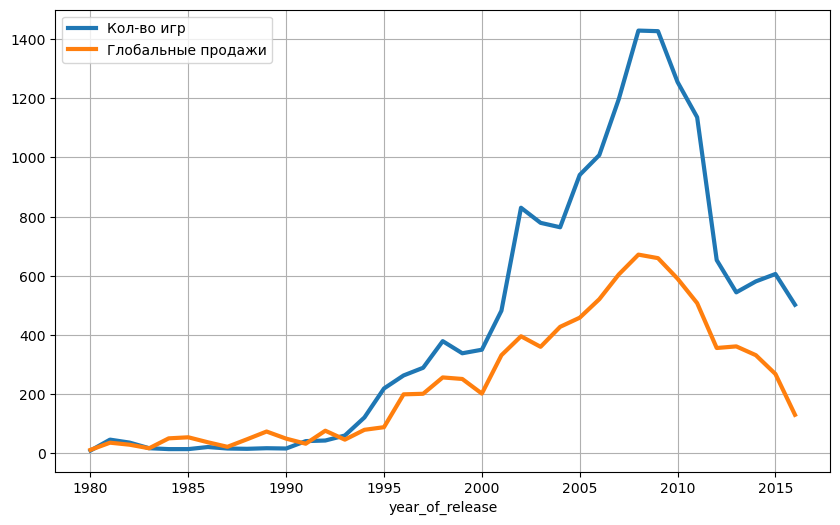

In [17]:
#Посмотрю как увеличивалось количество игр в зависимости от года
df.groupby('year_of_release')['name'].count().plot(figsize=(10, 6), label='Кол-во игр', lw=3)
df.groupby('year_of_release')['total_sales'].sum().plot(figsize=(10, 6), label='Глобальные продажи', lw=3)
plt.grid(axis='both')
plt.legend(loc='best');


С 1980 года по 2009 количество игр в целом росло. До 2000-х годов оценки экспертов особо небыло, но с 1989 года, игры начали расходиться не плохими тиражами. В 1994 году был заметный скачек выпуска игр, более чем в 2 раза. Оно и логично - появилась первая PS (*Выход приставки PlayStation состоялся 3 декабря 1994 года в Японии*), а так же начали выпускать игры на PC. 

На мой взгляд, 1994 можно считать началом развития игровой индустрии. Не фанат плойки (люблю больше ПК), но мировое сообщество голосует "рублем", а Sony совершила прорыв с выпуском первой PS.

В 2007-2008 гг. заметно снижения выхода игр и их количество продаж. Скорее всего это связано с началом популяризации мобильных игр.

**Предварительный актуальный период: с 1994 - 2016 гг.**


### Изменение продаж по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [18]:
# создам сводную таблицу колличества продаж игр на кажой платформе по годам 
df_platforms = df.pivot_table(index=['platform', 'year_of_release'], values=['total_sales'], aggfunc='sum')
pd.set_option('display.max_rows', 30)
df_platforms.reset_index(inplace=True)
display(df_platforms)

# собираю время жизни и общее сумму продаж
df_platform_years = df_platforms.pivot_table(
    index=['platform'], values=['year_of_release', 'total_sales'], 
    aggfunc={'year_of_release': 'count', 'total_sales': 'sum'})

display(df_platform_years)

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


,total_sales,year_of_release
platform,,
2600,86.48,10
3DO,0.10,2
3DS,257.81,6
DC,15.95,7
DS,802.79,11
...,...,...
Wii,891.18,11
WiiU,82.19,5
X360,961.25,12


In [19]:
pd.set_option('display.max_rows', None)
print('Самые популярные игры:')
print(df_platform_years.sort_values(by='total_sales', ascending=False), '\n')

print('Самая долгоживущая:')
print(df_platform_years.sort_values(by='year_of_release', ascending=False), '\n')

pd.set_option('display.max_rows', 20)
df_platform_years.describe()


Самые популярные игры:
          total_sales  year_of_release
platform                              
PS2           1247.28               12
X360           961.25               12
PS3            931.34               11
Wii            891.18               11
DS             802.79               11
PS             727.58               10
PS4            314.14                4
GBA            312.88                8
PSP            290.34               12
3DS            257.81                6
PC             255.76               26
GB             254.43               13
XB             252.66                9
NES            251.05               12
N64            218.01                7
SNES           200.04               10
GC             197.03                7
XOne           159.32                4
2600            86.48               10
WiiU            82.19                5
PSV             53.81                6
SAT             33.59                6
GEN             28.35                5
DC

,total_sales,year_of_release
count,31.00000,31.000000
mean,284.84871,7.677419
std,345.21832,5.081910
min,0.03000,1.000000
25%,22.15000,4.000000
50%,200.04000,7.000000
75%,301.61000,11.000000
max,1247.28000,26.000000


In [20]:
platform_top_10 = df_platform_years.sort_values(by='total_sales', ascending=False).head(10)
print(platform_top_10, '\n')


platform_top_10_list = platform_top_10.index.to_list()
print('Название 10 популярнейших платформ:')
print(platform_top_10_list)


          total_sales  year_of_release
platform                              
PS2           1247.28               12
X360           961.25               12
PS3            931.34               11
Wii            891.18               11
DS             802.79               11
PS             727.58               10
PS4            314.14                4
GBA            312.88                8
PSP            290.34               12
3DS            257.81                6 

Название 10 популярнейших платформ:
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


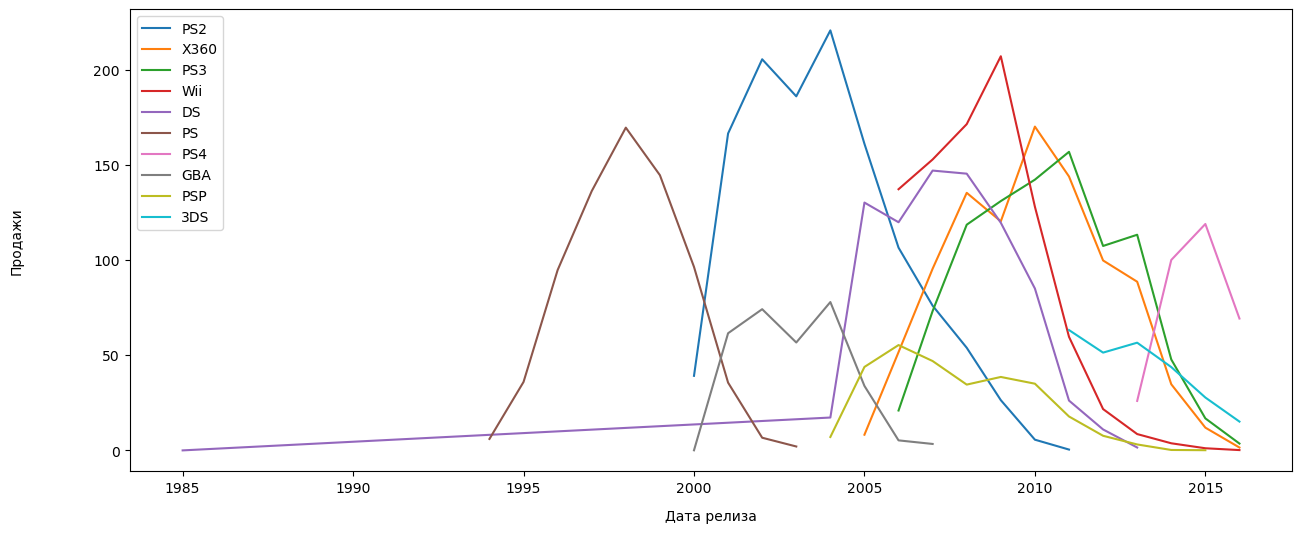

In [21]:
for name in platform_top_10_list:
    df.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (15, 6), label=name)
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

**Промежуточный вывод** 

Самая долго живущая "приставка" — это получается компьютер, но, честно говоря, очень часто компьютер обновляется даже чаще консолей, к тому же игры делались под разные оси: win 10, 7, XP и т.д. Поэтому относить игры или смотреть на года ПК не очень практично, при этом компьютер даже не входит в топ-10 по продажам.

Более популярные оказались приставки Японской компании Sony, можно обратить внимание, что в 2004 году с выходом "Популяризации" платформы DS начинают падать продажи у PS2 и в 2005 году выходит PS3 (понятно, что в разработке она была дольше, но возможно DS опередила) 

Несмотря на то, что XOne вышел примерно в одно время с PS4 количество продаж меньше в два раза.
Среднее время жизни популярных приставок 11-12 лет, но можно обратить внимание, что новая приставка выходит раньше (идет пересечение выпуска PS и PS2 в 2007-2008 гг) и продолжают выходить игры. Но данный срок можно считать скорее остаточным следом, нежели полноценной жизнью. Так как поддержка консоли прекращается раньше, чаще всего с выходом консоли нового поколения.

Приставки принципиально нового типа развлечений, так же влияют на продажи, к примеру Wii как быстро загораются, так и быстро надоедают пользователям.

**Старый вывод:**(ака зачеркнуто)

Для определения актуального периода я бы стал рассматривать с начала продаж PS2 - 2005 год. В идеале раньше, когда происходит первый спад продаж у PS. Почему именно 2005 год, так как в этот период, происходит пересечение приставки предыдущего поколения, проверка смены трендов в игровой индустрии так же могла повлиять. Если взять промежуток меньше, то есть риск увидеть популярность, влияние только одной приставки, определенный тренд *(как было с Wii на активные кооперативные игры)*, для анализа нужно видеть цикличность трендов, что набирается популярность, а что уже не популярно.

**Новый вывод:**

Возьмем актуальный период с 2013 г, дата выхода 4 поколения приставки PS, исходя из этого сможем строить планы на 2017 год, т.к. минимум до 2019 данное поколение будет актуально и не попавший XOne.


**Окончательный актуальный период: с 2013 - 2016 гг.**



### Определение актуального периода

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.


In [22]:
#Отберу игры только с нужным годом
df_2013 = df.query('year_of_release >= 2013')
df_2013.reset_index(inplace=True, drop = True)
df_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [23]:
df_2013.info()
df_2013.isna().mean()*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 200.7+ KB


name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       55.620242
user_score         46.618898
rating              0.000000
total_sales         0.000000
dtype: float64

### Анализ платформ по продажам

* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. **Опишите результат.**

* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. **Сформулируйте выводы.**

* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Платформы лидеры по продажам

In [24]:
platform_top_sales_2013 = (df_2013.groupby(['platform'],as_index = False)['total_sales']
                        .sum().sort_values('total_sales',ascending = False))
platform_top_sales_2013.reset_index(inplace=True, drop = True)                    
print(platform_top_sales_2013)

   platform  total_sales
0       PS4       314.14
1       PS3       181.43
2      XOne       159.32
3       3DS       143.25
4      X360       136.80
5      WiiU        64.63
6        PC        39.43
7       PSV        32.99
8       Wii        13.66
9       PSP         3.50
10       DS         1.54


In [25]:
platform_top10_2013_list = platform_top_sales_2013.head(10)['platform'].to_list()
platform_top10_2013_list

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

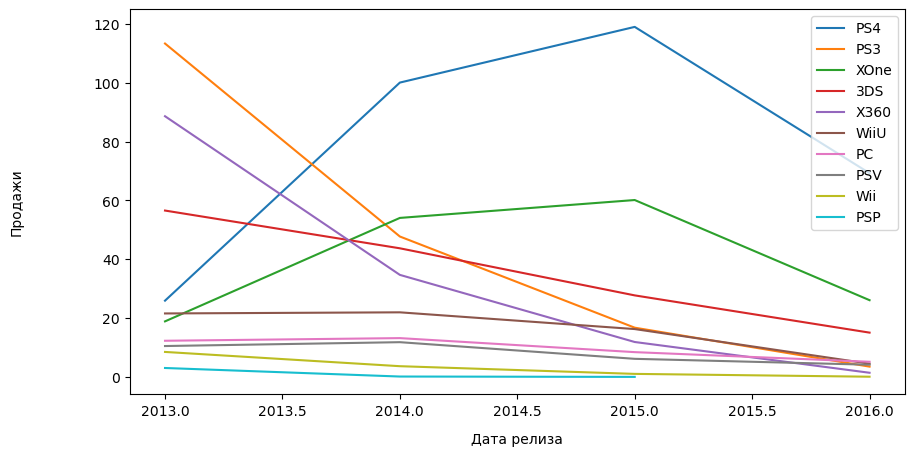

In [26]:
for name in platform_top10_2013_list:
    df_2013.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (10, 5), label=name)
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

**Размышления 2**
<a id='Mysl_02'></a>

С 2013 самый заметный пик у приставки PS4, и она же на первом месте. Не смотря, на то, что X360 активно боролся с PS3, следующая версия оказалась не такой популярной XOne заметно проседает по сравнению с PS4  и даже отстает от PS3.

Можно заметить, что спад по продажам, заметен по всем направлениям, однаком данные графики не отражают общий настрой игровой индустрии. Мы не видим условно-бесплатные игры и мобильные игры.

In [27]:
filter_platform_top10 = df_2013['platform'].isin(platform_top10_2013_list)
platform_top10_2013 = df_2013[filter_platform_top10]
platform_top10_2013

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


#### Диаграмма размаха по глобальным продажам игр

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

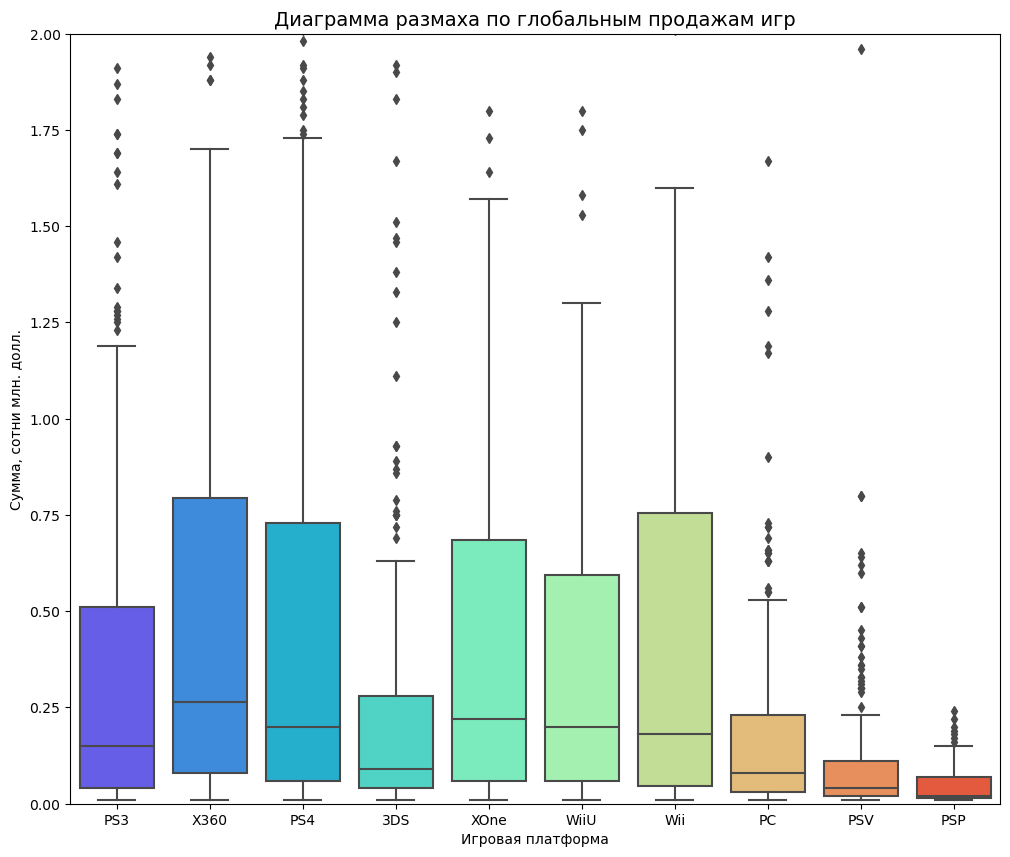

In [28]:
plt.figure(figsize=(12, 10))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="total_sales", data=platform_top10_2013, palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам игр', fontsize=14)
plt.ylabel('Сумма, сотни млн. долл.')
plt.xlabel('Игровая платформа');

Наш ящичек дополнил [Размышления 2](#Mysl_02) - больше всего продаж у Х360, PS3, PS4, XOne и Wii. Медианные значения у этой группы выше чем у остальных, а у Х360 и PS3 вообще равны (визуально кажется). PC все так же не популярен)

#### Анализ влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы 

* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
* Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. **Сформулируйте выводы.**
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами

In [29]:
# выберу самую популярную платформу
platform_top_sales_2013.head()
# на первом месте X360 (уже на последнем, можем посмотреть как влияет минимальное количество продаж)

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


In [30]:
print('X360 - я выбираю тебя!')

X360 - я выбираю тебя!


##### Построение диаграммы рассеяния для X360

In [31]:
filter_platform_X360 = platform_top10_2013['platform'].isin(['X360'])
platform_X360 = platform_top10_2013[filter_platform_X360]
platform_X360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
37,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
40,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
2113,Caladrius,X360,2013,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
2147,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
2152,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
2159,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01


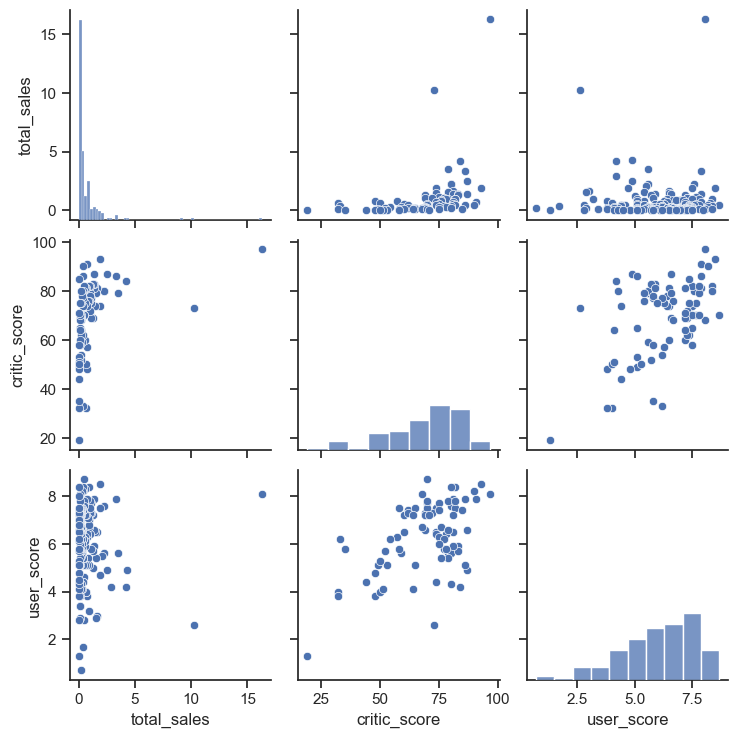

In [32]:
cols_X360 = ['total_sales', 'critic_score', 'user_score']
sns.set(style="ticks", color_codes=True)
sns_plot = sns.pairplot(platform_X360[cols_X360]);

**Промежуточный вывод**
* Можно заметить связь между оценками пользователей и критиками
* Чаще всего чем выше оценки критиков, тем лучше продажи у игры.

##### Построение диаграммы рассеяния для Other

In [33]:
platform_other = platform_top10_2013[~filter_platform_X360]
platform_other

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


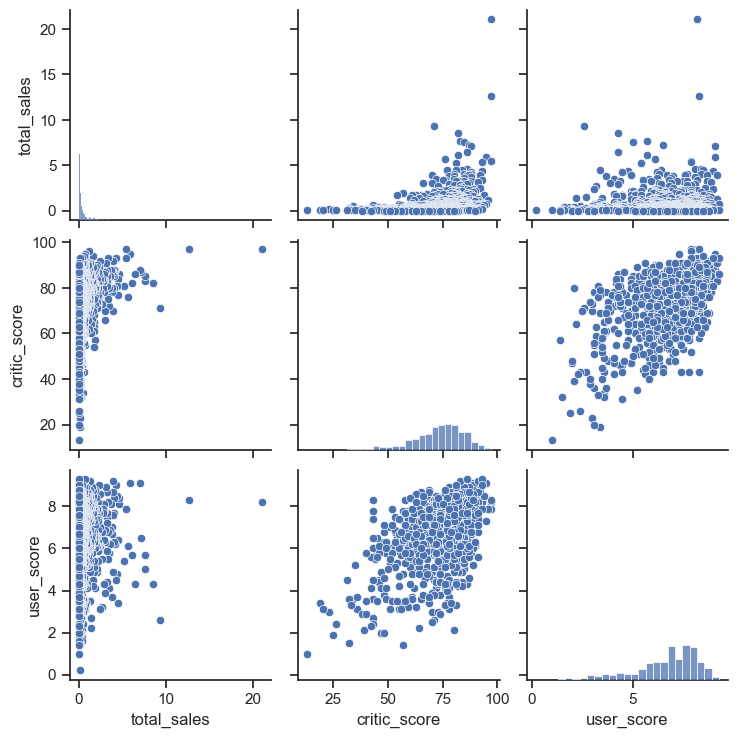

In [34]:
cols_other = ['total_sales', 'critic_score', 'user_score']
sns.set(style="ticks", color_codes=True)
sns_plot = sns.pairplot(platform_other[cols_other]);

**Прмоежуточный вывод**

* В целом видим схожую картинку, однако корреляция оценки пользователей с критиками, более плотная, без ярких разбросов
* Рост продаж не так заметен, при высоких оценках пользователей/критиков, более ровные
* бывают случаи когда высокие оценки критиков, низко оцениваются пользователями (возможно купленные отзывы/обзоры)

#### Анализ разных игрулек 

In [35]:
# Посмотрим на самые прибыльные игры
platform_top10_2013.sort_values(by='total_sales', ascending=False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [36]:
print('Самая популярная игра на Wii:')
display(df.query('name == "Wii Sports"'))
print()
print()

print('Самая популярная игра на DS:')
display(df.query('name == "New Super Mario Bros."'))
print()
print()

print('Самая популярная игра на X360:')
display(df.query('name == "Kinect Adventures!"'))
print()
print()

print('Самая популярная игра на PS3:')
display(df.query('name == "Grand Theft Auto V"'))
print()
print()

print('Самая популярная игра на PS4:')
display(df.query('name == "Call of Duty: Black Ops 3"'))
print()
print()

print('Самая популярная игра на 3DS:')
display(df.query('name == "Pokemon X/Pokemon Y"'))


Самая популярная игра на Wii:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54




Самая популярная игра на DS:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.5,2.88,89.0,8.5,E,29.8




Самая популярная игра на X360:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.0,4.89,0.24,1.69,61.0,6.3,E,21.82




Самая популярная игра на PS3:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17




Самая популярная игра на PS4:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,NaN,NaN,unknown,1.70
1062,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,NaN,NaN,unknown,1.69
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,unknown,0.26




Самая популярная игра на 3DS:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.6


Плафтормы по разному продвигают себя, в некоторых они выпускают так называемые "эксклюзивы" игры которые представляются, только на одном типе консоли. 

Но в тоже время, есть игры которые выпускаются на всех типах консили, в том числе предыдущем поколении *(Например: Grand Theft Auto V или Call of Duty: Black Ops 3)* так еще и иногда в разные годы. Например Пк-бояре ждали гтаашечку целых 2 года. Вот такие вот дела, малята

#### Распределение по жанрам

In [37]:
genre_sales = df_2013.pivot_table(
    index=['genre'], values=['total_sales', 'name'], aggfunc={'total_sales':'sum', 'name':'count'}
    )
genre_sales.columns = ['name_count', 'total_sales']


genre_sales.sort_values(by=['total_sales', 'name_count'], ascending=False)



,name_count,total_sales
genre,,
Action,766,321.87
Shooter,187,232.98
Sports,214,150.65
Role-Playing,292,145.89
Misc,155,62.82
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


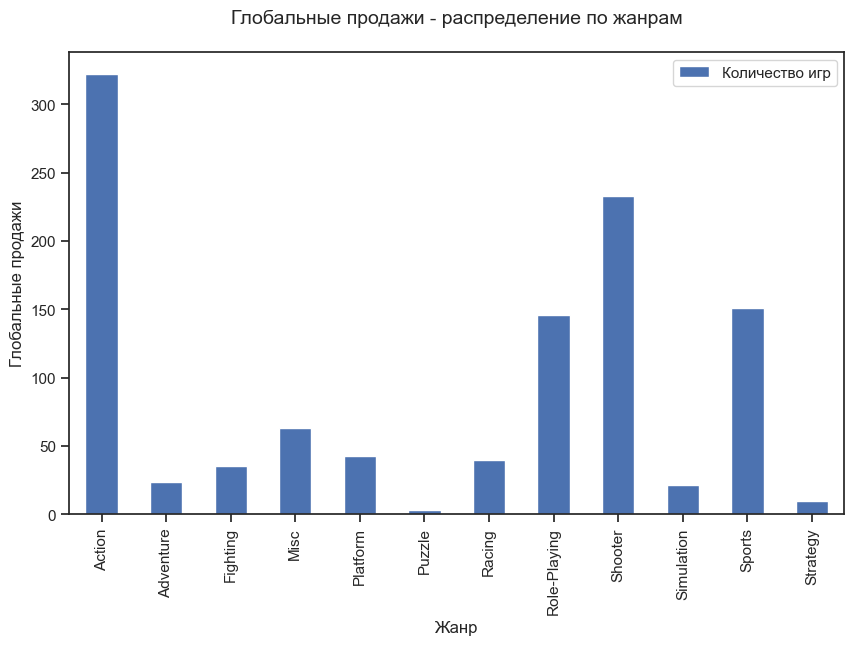

In [38]:
ax=genre_sales['total_sales'].plot(kind='bar', figsize=(10, 6))
plt.title('Глобальные продажи - распределение по жанрам\n  ', fontsize=14)
plt.ylabel('Глобальные продажи')
plt.xlabel('Жанр')
plt.legend(['Количество игр'], loc='best')

In [39]:
genre_sales.sort_values(by='name_count', ascending=False)

,name_count,total_sales
genre,,
Action,766,321.87
Role-Playing,292,145.89
Adventure,245,23.64
Sports,214,150.65
Shooter,187,232.98
Misc,155,62.82
Racing,85,39.89
Fighting,80,35.31
Platform,74,42.63


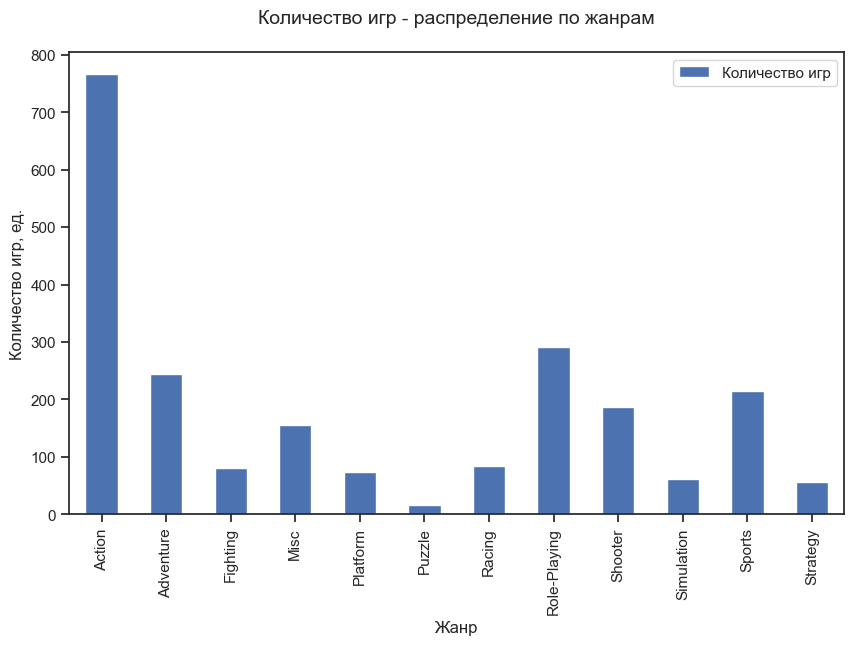

In [40]:
ax=genre_sales['name_count'].plot(kind='bar', figsize=(10, 6))
plt.title('Количество игр - распределение по жанрам\n  ', fontsize=14)
plt.ylabel('Количество игр, ед.')
plt.xlabel('Жанр')
plt.legend(['Количество игр'], loc='best')

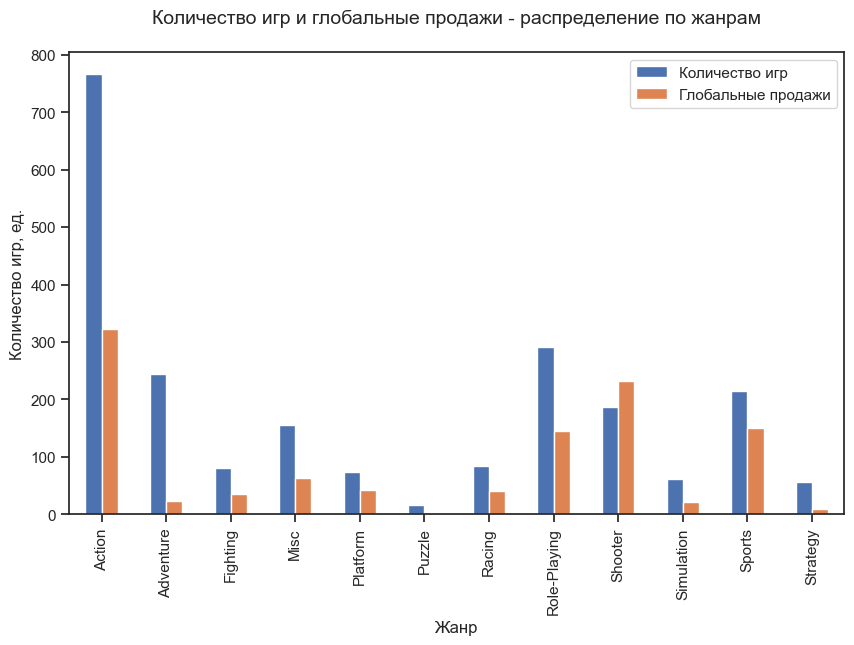

In [41]:
#Посмотрим вместе как выглядит
ax=genre_sales[['name_count', 'total_sales']].plot(kind='bar', figsize=(10, 6))
plt.title('Количество игр и глобальные продажи - распределение по жанрам\n  ', fontsize=14)
plt.ylabel('Количество игр, ед.')
plt.xlabel('Жанр')
plt.legend(['Количество игр', 'Глобальные продажи'], loc='best')


In [42]:
genre_sales['sales_indicator'] = genre_sales.loc[:, 'total_sales'] / genre_sales.loc[:, 'name_count']
genre_sales.sort_values(by='sales_indicator', ascending=False)

,name_count,total_sales,sales_indicator
genre,,,
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972
Platform,74,42.63,0.576081
Role-Playing,292,145.89,0.499623
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Action,766,321.87,0.420196
Misc,155,62.82,0.405290
Simulation,62,21.76,0.350968


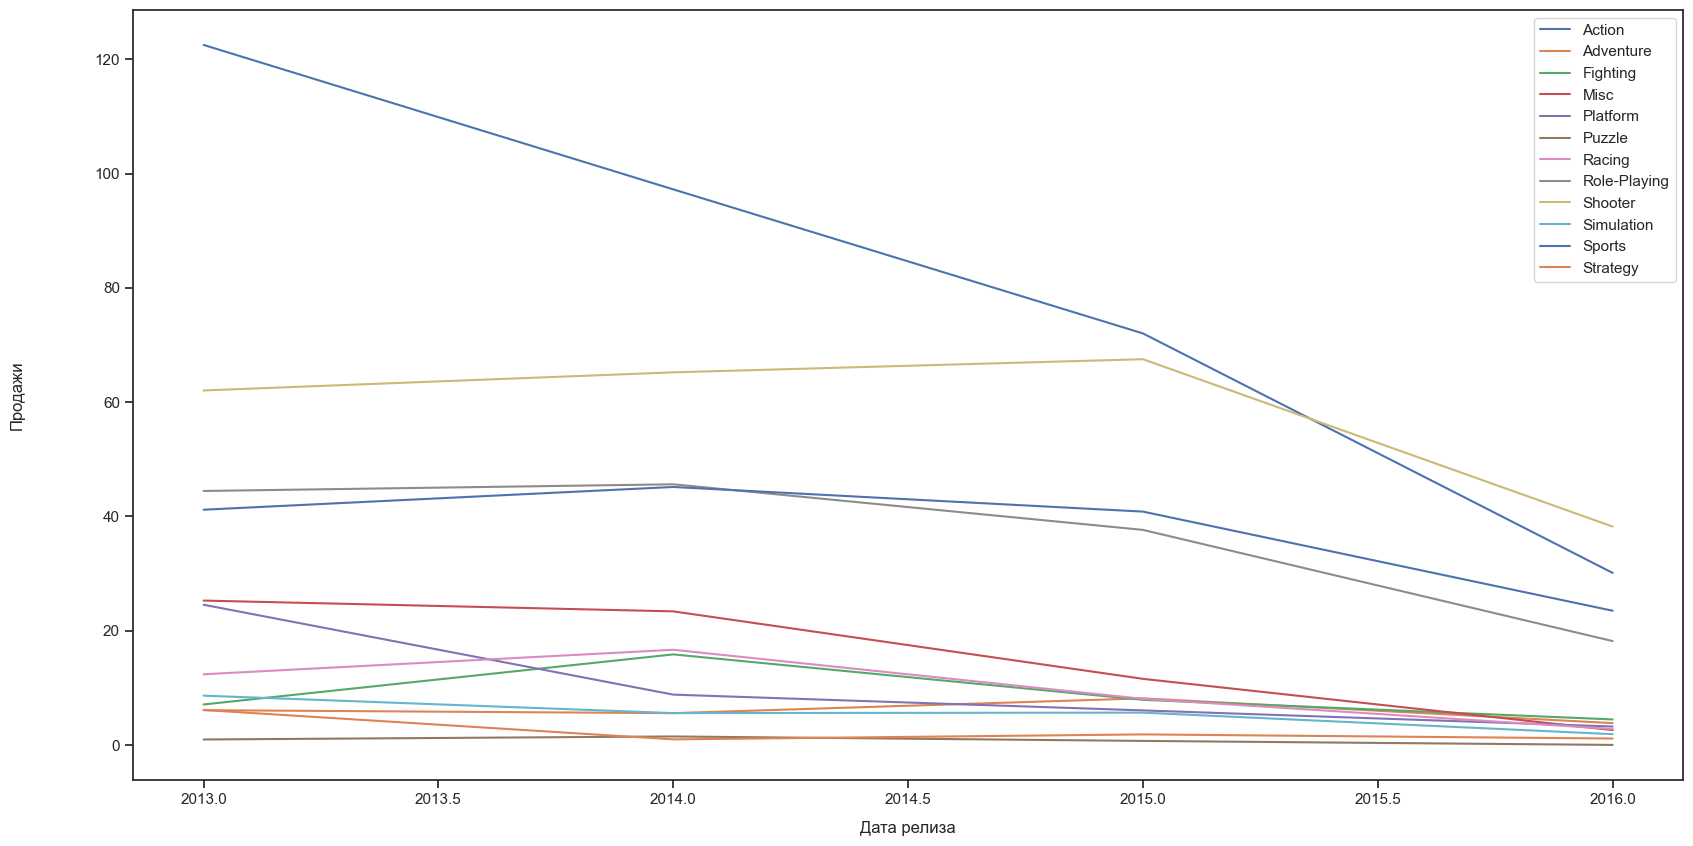

In [43]:
genre_list = genre_sales.index.to_list()
genre_list

for name in genre_list:
    df_2013.query('genre == @name').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (20, 10), label=name)
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

In [44]:
genre_median = df_2013.groupby('genre').median()
genre_median['sales_median'] = genre_median['na_sales'] + \
    genre_median['eu_sales'] + genre_median['jp_sales'] + genre_median['other_sales']
genre_median.reset_index(inplace=True)
display(genre_median)



,genre,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,sales_median
0,Action,2015.0,0.020,0.020,0.01,0.010,73.0,7.10,0.110,0.060
1,Adventure,2014.0,0.000,0.000,0.01,0.000,72.0,7.50,0.030,0.010
2,Fighting,2014.0,0.045,0.020,0.03,0.010,72.0,7.50,0.125,0.105
3,Misc,2014.0,0.010,0.010,0.02,0.000,75.0,7.00,0.100,0.040
4,Platform,2014.0,0.090,0.080,0.00,0.025,77.0,7.10,0.225,0.195
5,Puzzle,2014.0,0.000,0.000,0.02,0.000,71.0,7.50,0.060,0.020
6,Racing,2014.0,0.030,0.060,0.00,0.010,74.0,6.20,0.120,0.100
7,Role-Playing,2014.0,0.020,0.010,0.05,0.010,74.0,7.60,0.125,0.090
8,Shooter,2014.0,0.200,0.190,0.00,0.050,76.0,6.55,0.450,0.440
9,Simulation,2015.0,0.000,0.035,0.00,0.005,69.5,6.80,0.100,0.040


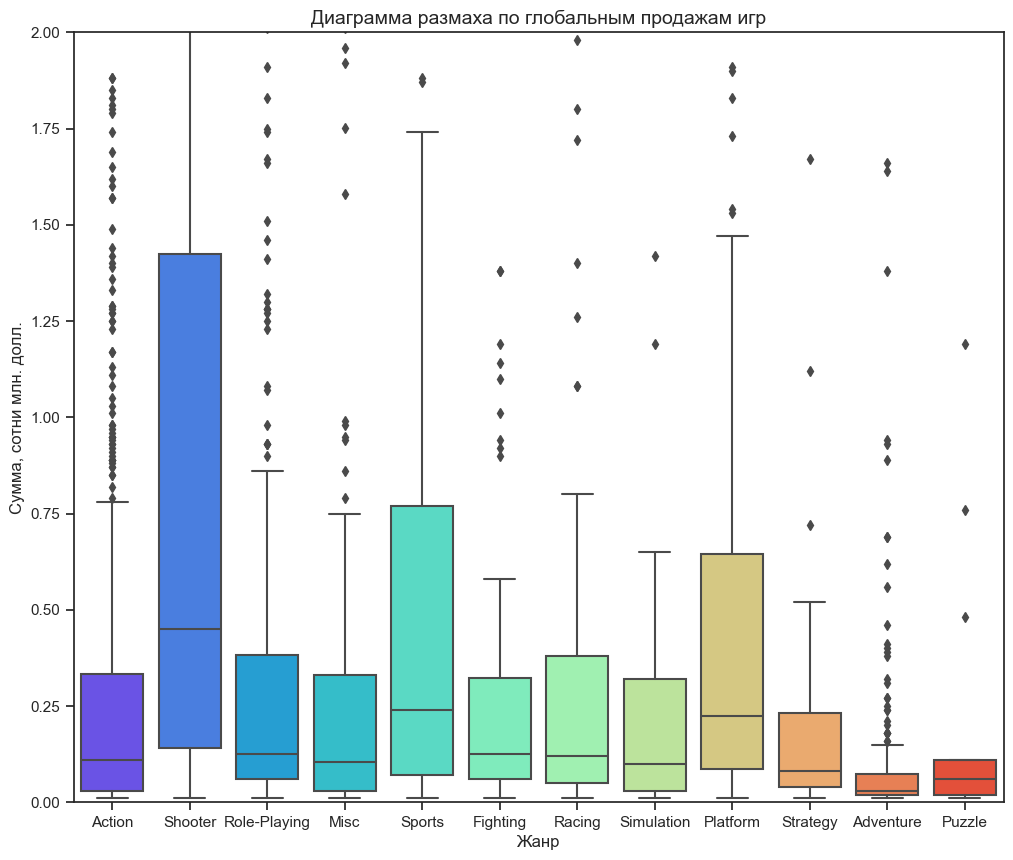

In [45]:
plt.figure(figsize=(12, 10))
plt.ylim(0, 2,5)
sns.boxplot(x="genre", y="total_sales", data=platform_top10_2013, palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам игр', fontsize=14)
plt.ylabel('Сумма, сотни млн. долл.')
plt.xlabel('Жанр');

**Промежуточный вывод**

Как можем заметить:
* в 2016 году жанр Shooter "обошёл" жанр Action (хотя лучше сказать, хуже упал)
* самые популярные игр жанра Action, Sports и Shooter
* больше всего выпускаемых игр жанра Action, Role-Playing и Adventure
* Жанр Shooter показывает себя лучше всего, на каждую выпущенную игру приносит 1.246 млн продаж
* Жанр Adventure показывает себя хуже всего, на каждую выпущенную игру приносит 0.096 млн продаж
* С 2013 года жанр Action заметно снижается количество продаж 
    
**Боксплот:**
Как видим медианные значения хорошо показывают положение жанра на рынке. Хуже всего дела обстаят у Adventure и Puzzle. Лучше всего себя чувствуют Sports, Shooter и наудивление Platform. У Action достаточно много выбросов.

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [46]:
regions_list = ['na_sales','eu_sales','jp_sales']
print(df_2013[regions_list].sum())

na_sales    437.71
eu_sales    392.23
jp_sales    140.78
dtype: float64


### Самые популярные платформы (топ-5)

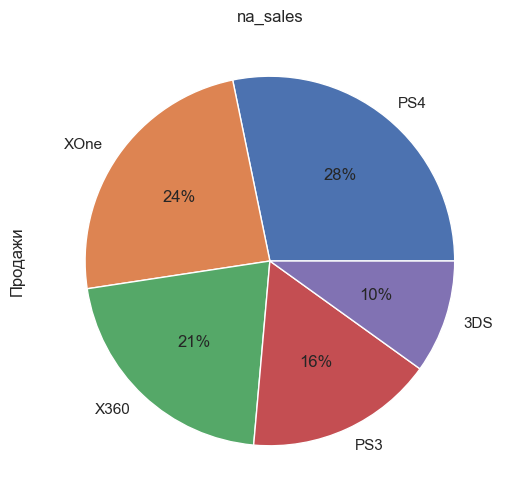

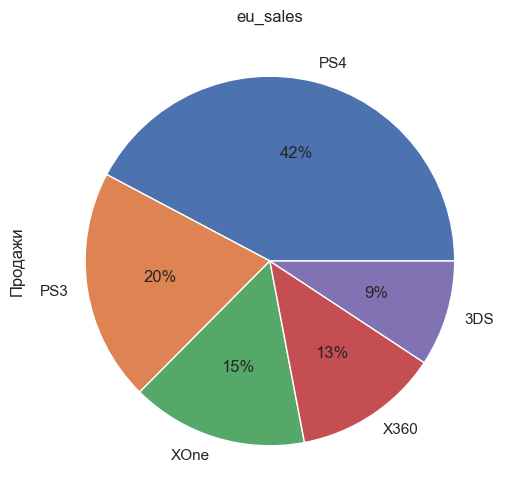

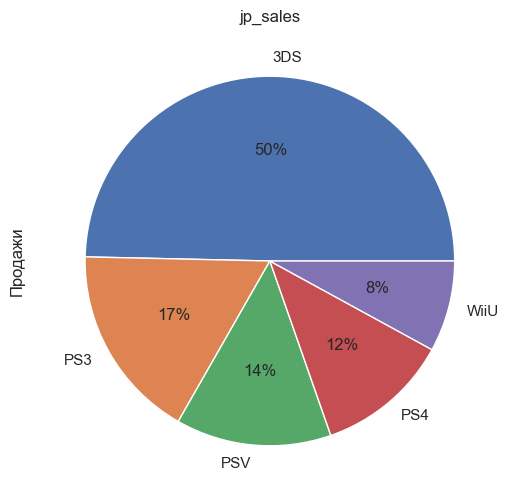

In [47]:
for region in regions_list:
    (df_2013.pivot_table(index='platform', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

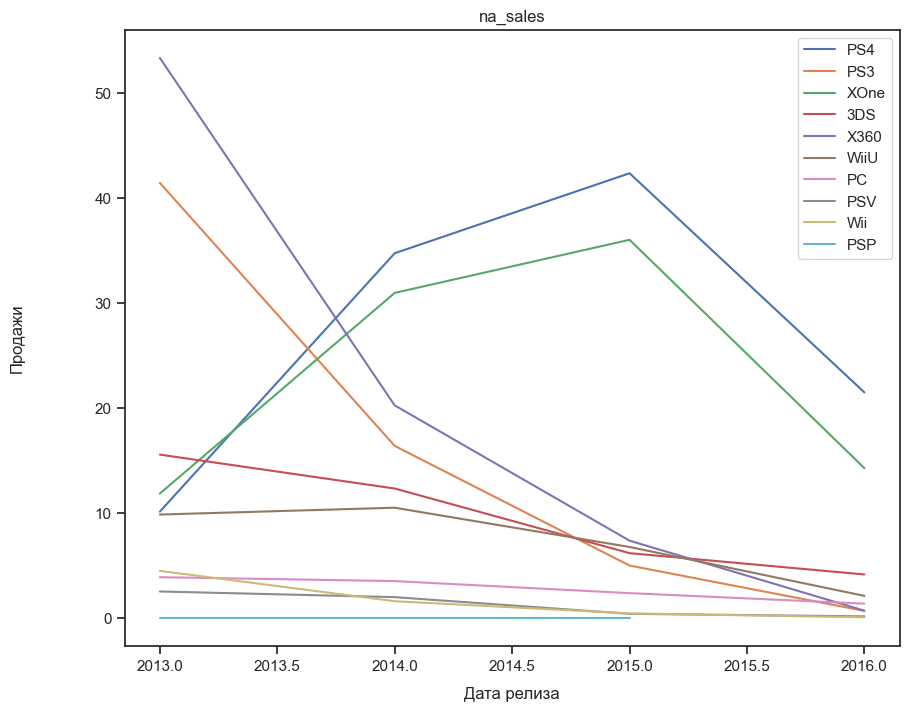

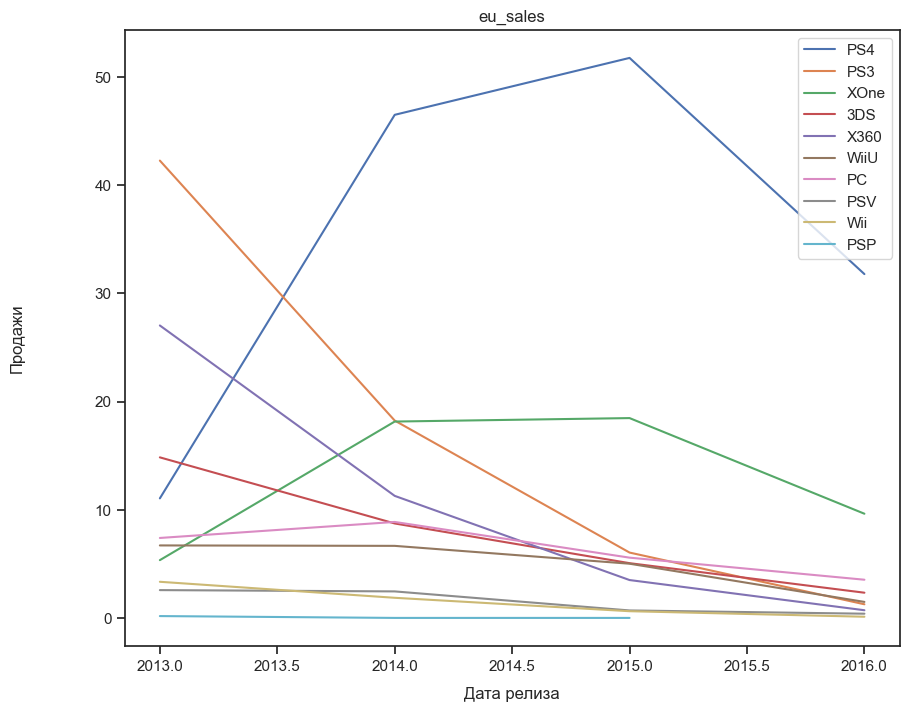

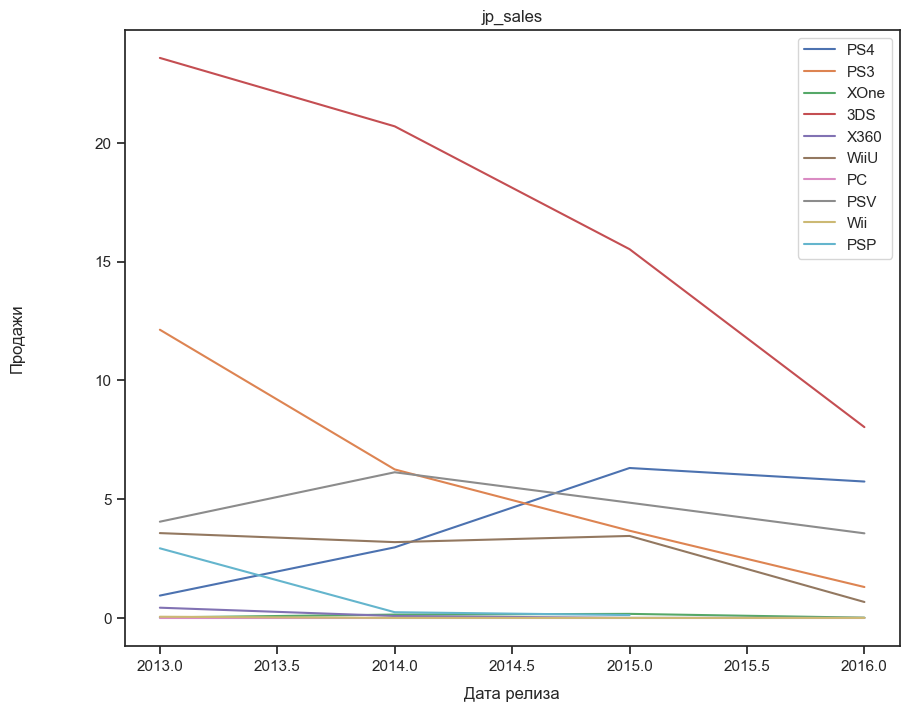

In [48]:
for region in regions_list:
    for name in platform_top10_2013_list:
        (df_2013.query('platform == @name')
         .pivot_table(index = 'year_of_release',values = region, aggfunc = 'sum')
         .sort_values('year_of_release',ascending = False)[region].head(5)
         .plot(figsize = (10, 8), label=name, title = region)
         .set(ylabel='Продажи')
                  
        )
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()
    plt.show()



**Промежуточный вывод:**

Северная америка:
* Наиболее популярные модели XOne и PS4
* Наименее популярные PS3 и 3DS

Европа:
* Наиболее популярные модели PS4 и PS3
* Наименее популярные PS2 и DS

Япония:
* Наиболее популярные модели 3DS (доминирует) и PS3
* Наименее популярные WiiU и PS4 (набирает популярность)

### Самые популярные жанры (топ-5)

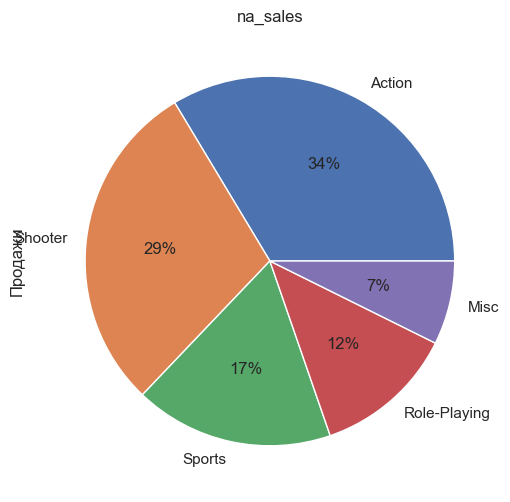

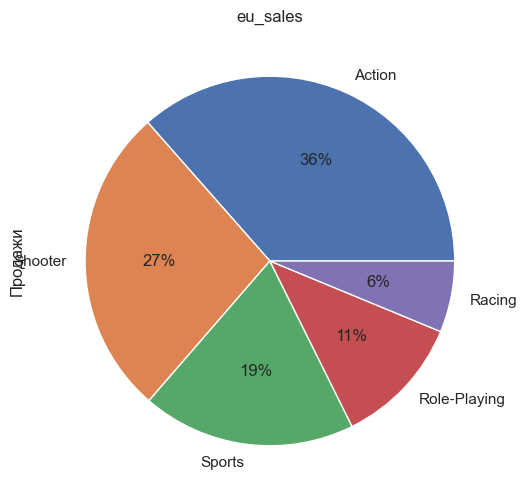

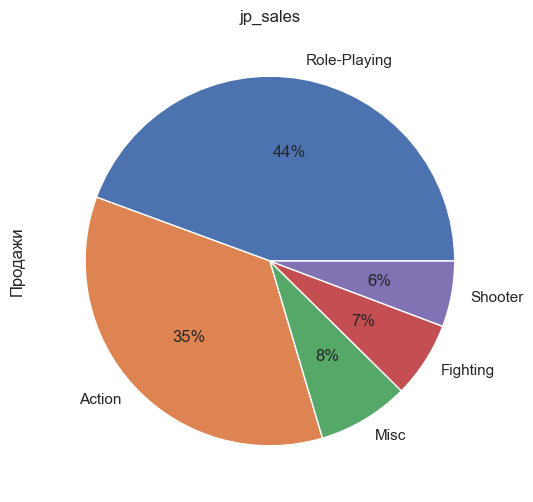

In [49]:
for region in regions_list:
    (df_2013.pivot_table(index='genre', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()
    
    
    

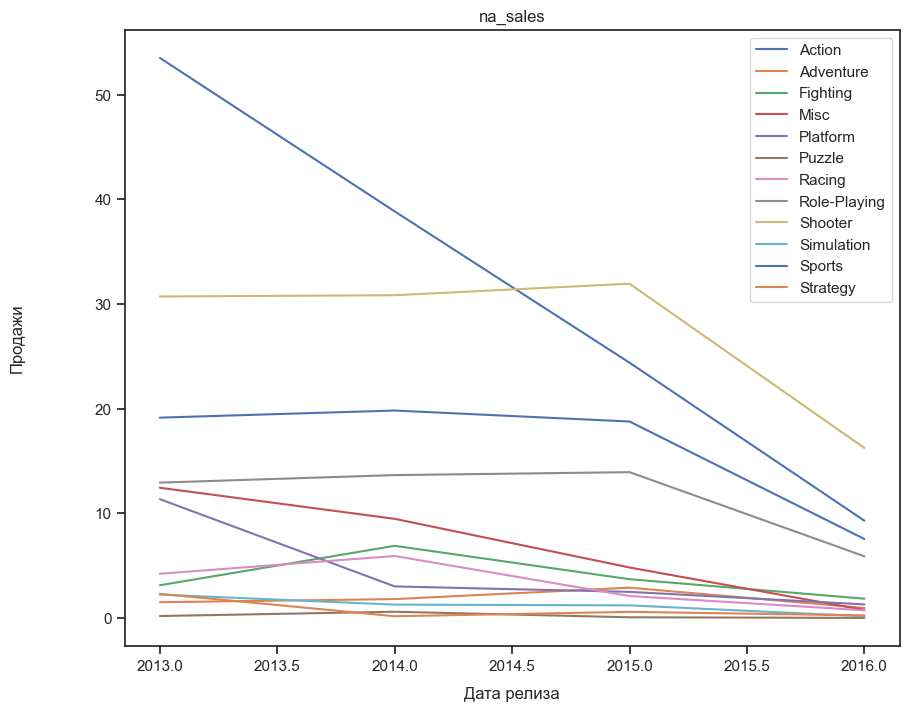

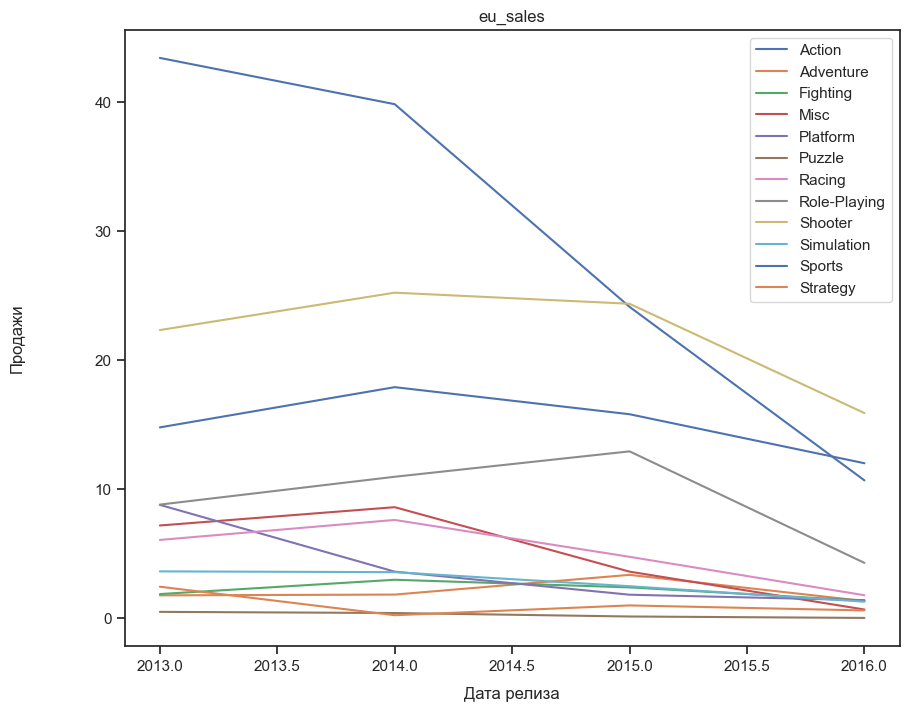

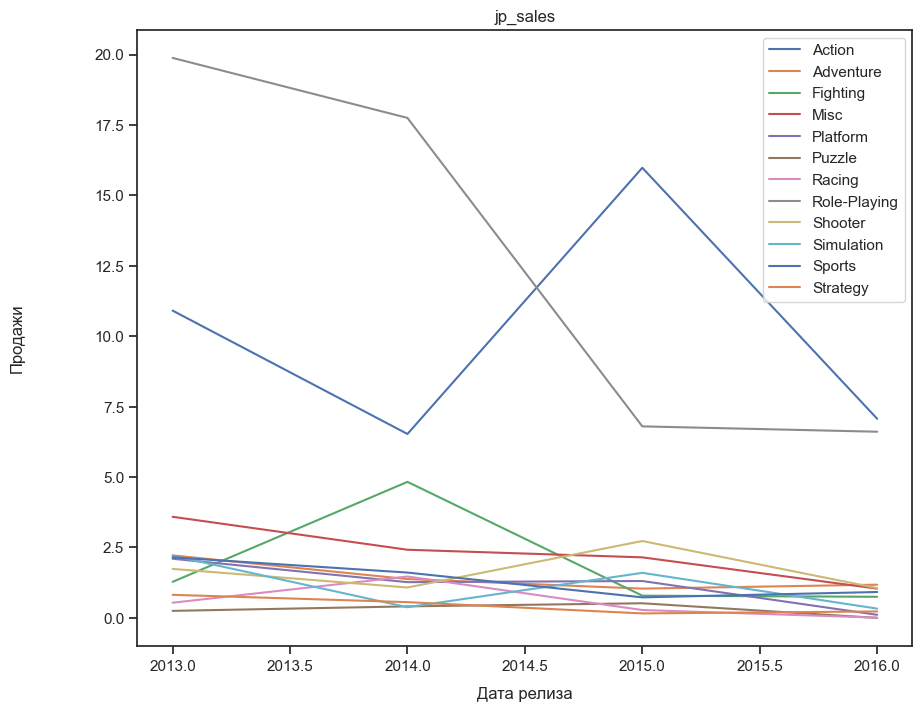

In [50]:
for region in regions_list:
    for name in genre_list:
        (df_2013.query('genre == @name')
         .pivot_table(index = 'year_of_release',values = region, aggfunc = 'sum')
         .sort_values('year_of_release',ascending = False)[region].head(5)
         .plot(figsize = (10, 8), label=name, title = region)
         .set(ylabel='Продажи')
                  
        )
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()
    plt.show()


**Промежуточный вывод:**

Северная америка:
* Наиболее популярный жанр Action и Shooter
* Наименее популярный жанр Misc и RP

Европа:
* Наиболее популярный жанр Action и Shooter
* Наименее популярный жанр Racing и RP


Япония:
* Наиболее популярный жанр RP и Action (доминируют)
* Наименее популярный жанр остальные в равной примерно

### Влияние рейтинга ESRB на продажи в отдельном регионе

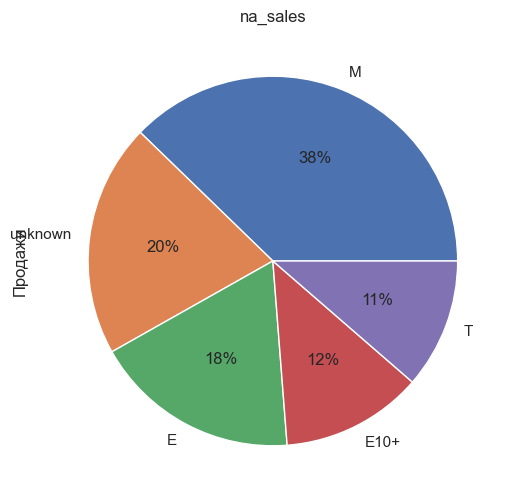

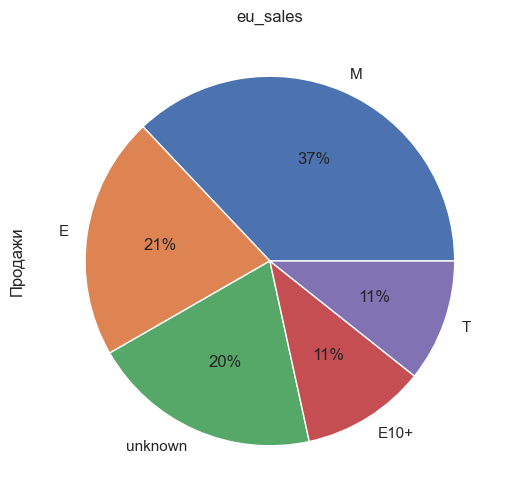

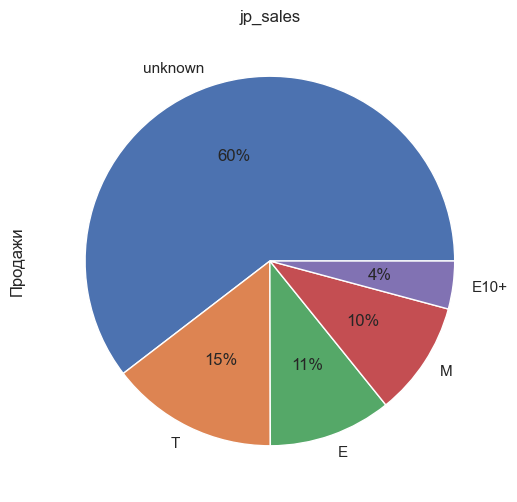

In [51]:
for region in regions_list:
    (df_2013.pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(region, ascending=False)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='Продажи')
    )
    plt.show()

**Промежуточный вывод:**

Напоминание, какой рейтинг, что значит [Рейтинг - ТУТ](#rating) 

Северная америка:
* Наиболее популярный рейтинг M и unknown
* Наименее популярный рейтинг T и E10+

Европа:
* Наиболее популярный рейтинг M и E
* Наименее популярный рейтинг T и E10+


Япония:
* Наиболее популярный рейтинг unknown (доминирует) и T 
* Наименее популярный рейтинг M и E10+

Популярность игр с рейтингом unknown может означать, что либо допущена ошибка в базе с которой брались данные (были не заполнены к примеру call of duty black ops 2 имеет рейтинг ESRB - M. Так же популярность игр с данным рейтингом в Японии может объяснять спицифичные локальные игры которые не оцениваются ESRB

## Проверка Гипотез

### Гипотеза 1
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Н0** ***(нулевая гипотеза)*** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Н1** ***(альтернативная гипотеза)*** - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

**Уровень значимости** ***(пороговое значение)*** установим как **5%** (как общепринятый параметр)

In [52]:
mean_pc = df_2013.loc[df_2013['platform'] == 'PC', 'user_score'].mean(skipna=True)
mean_pc

6.269677419354836

In [53]:
XOne = df_2013.loc[df_2013['platform'] == 'XOne', 'user_score']
XOne

14      NaN
22      7.9
24      5.4
31      6.4
39      6.2
       ... 
2204    8.2
2208    6.6
2210    NaN
2215    6.7
2219    NaN
Name: user_score, Length: 247, dtype: float64

In [54]:
alpha = 0.05            

results = st.ttest_1samp(XOne, mean_pc, nan_policy='omit')
print('p-значение: ', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  0.014855783399240645
Отвергаем нулевую гипотезу


In [55]:
alpha = 0.05  

result=st.ttest_1samp(XOne,mean_pc) 
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (result.pvalue/2<alpha) and (XOne.mean()>=mean_pc):
    print('Отвергаем альтернативную гипотезу')
else:
    print('Не получилость отвергнуть альтернативную гипотезу')

p-значение: 0.014855783399240645
Не получилость отвергнуть альтернативную гипотезу


* среднее значение рейтинга XOne >= PC
* разница среднего значения и статистической значимости деленой пополам была существенной

### Гипотеза 2
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Н0** ***(нулевая гипотеза)*** - cредние пользовательские рейтинги жанров Action и Sports одинаковые.

**Н1** ***(альтернативная гипотеза)*** - cредние пользовательские рейтинги жанров Action и Sports различаются.

**Уровень значимости** ***(пороговое значение)*** установим как **5%** (как общепринятый параметр)


In [56]:
mean_action = df_2013.query("genre == 'Action'")['user_score'].mean(skipna=True)
sport = df_2013.query("genre == 'Sports'")['user_score']

mean_action


6.837532133676097

In [57]:
alpha = 0.05            

results = st.ttest_1samp(sport, mean_action, nan_policy='omit')
print('p-значение: ', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.1561559357281875e-22
Отвергаем нулевую гипотезу


In [58]:
alpha = 0.05  

result=st.ttest_1samp(sport,mean_action) 
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (result.pvalue/2<alpha) and (sport.mean()>=mean_action):
    print('Отвергаем альтернативную гипотезу')
else:
    print('Не получилость отвергнуть альтернативную гипотезу')

p-значение: 3.1561559357281875e-22
Не получилость отвергнуть альтернативную гипотезу


* среднее значение пользовательских оценок sport >= action
* разница среднего значения и статистической значимости деленой пополам была существенной

## Общий вывод

В результате исследования были выявлен ряд явных и неявных ошибок. Была проведена работа по предобработке данных. Часть данных требует уточнения или дополнения. Подготовил дополнительные столбцы для облегчения обработки данных в дальнейшем.

* До 2008 года, был виден заметный и стабильный рост выхода новых игр и продажа их копий, после 2008 года заметна смена тренда.
* Высокие оценки пользователей и критиков положительно влияют на продажи
* Существуют разные варианты эксклюзивности игр, мультиплатформенные приносят больше прибыли. Но эксклюзивность может давать дополнительные плюшки
* в 2016 году жанр Shooter "обошёл" жанр Action (хотя лучше сказать, хуже упал)
* самые популярные игр жанра Action, Sports и Shooter
* больше всего выпускаемых игр жанра Action, Role-Playing и Adventure 
* Жанр Adventure показывает себя хуже всего, на каждую выпущенную игру приносит 0.096 млн продаж
* Жанр Shooter показывает себя лучше всего, на каждую выпущенную игру приносит 1.246 млн продаж
* Самая популярная платформа в Северной Америке и Европе – XOne, PS4 или PS4, в Японии: 3DS и PS3
* Самый популярный жанр в Северной Америке и Европе – «Action» и «Shooter», в Японии: «RP» и «Action»
* Самый популярный рейтинг в Северной Америке – «взрослых» и «unknown», Европе – «взрослых» и «для всех», в Японии: «unknown» и «для подростков» 
* Были проверены гипотезы


**Рекомендации на 2017 год:**

* Для более весомой аналитики, стоило бы рассмотреть варианты улучшения собранной информации и дополнении её.
* В 2017 году, стоит обратить внимание на игры жанра Shooter и Aсtion в Северной Америке или Европе, в случае выхода на японский рынок - RP или Aсtion. 
* Наиболее перспективные консоли на данный момент XOne и PS4 в Северной Америке или Европе в Японии еще популярен 3DS, но так же набирает популярность PS4. Стоит присмотреться к Nintendo, так как 3DS вышла в 2011 году, 2017 будет 6 лет, возможен анонс нового типа консоли, который изменит рынок. 


**Как улучшить исследование:**
* Более корректные/наполненные данными по играм, пропуски в Рейтинге и Оценках.
* Очевидно, не хватает данных по мобильным играм. Старт развития мобильных игр можно было бы приравнять к выходу первого iPhone и игры Tap Tap Revolution в 2008 году. Благодаря этому в теории возможно было бы предположить выход портативной консоли  Nintendo Switch
* Добавление нового жанра/категории Условно-бесплатные игры (Free-To-play) в которые входят как мобильные игры, так и некоторые MMO, MOBA.
* Возможность парсинга данных по прибыли FTP игр за счет множества микротранзаций. *(занимательная информация: для полной прокачки персонажа в новой мобильной игре Diablo необходимо около 100.000 долларов)*
 

